In [1]:
#import all the necessary modules

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [51]:
#read the dataset from remote machine 

In [52]:
trd = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/Loan prediction Problem/training_set.csv")
tsd = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/Loan prediction Problem/testing_set.csv")

In [53]:
#preview the dataset

In [54]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
tsd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
#Handling Missing values

In [57]:
trd.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
tsd.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
def replacer(A):
    import pandas as pd
    Q = pd.DataFrame(A.isna().sum(),columns=["CT"])
    missingcolumns = list(Q[Q.CT > 0].index)
    for i in missingcolumns:
        if(A[i].dtypes=="object"):
            replacer = A[i].mode()[0]
            A[i] = A[i].fillna(replacer)
        else:
            replacer = A[i].mean()
            A[i] = A[i].fillna(replacer)

In [60]:
replacer(trd)

In [61]:
replacer(tsd)

In [62]:
trd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
tsd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [64]:
#Data Profile

In [65]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [66]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [67]:
#Drop unnecessary columns and declare X,Y

In [68]:
X = trd.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Y = trd[["Loan_Status"]]

In [69]:
#Exploratory Data Analysis

#cat vs con --> boxplot, ANOVA

#cat vs cat --> countplot with hue | crosstab

In [70]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [71]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [72]:
con.remove("Credit_History")
cat.append("Credit_History")

In [73]:
anova_res = []
for i in con:
    anova_res.append(ANOVA(trd,"Loan_Status",i))

In [74]:
list(zip(con,anova_res))

[('ApplicantIncome', 0.903),
 ('CoapplicantIncome', 0.142),
 ('LoanAmount', 0.368),
 ('Loan_Amount_Term', 0.604)]

In [75]:
# DataPreprocessing

In [76]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XS1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
XS2 = pd.get_dummies(X[cat])
X = XS1.join(XS2)

In [77]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [78]:
#split the data in training and testing data

In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=34)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

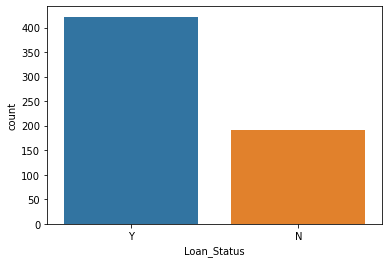

In [80]:
sb.countplot(Y.Loan_Status)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

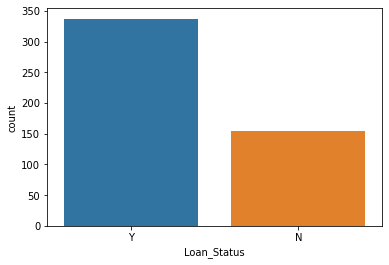

In [81]:
sb.countplot(ytrain.Loan_Status)

In [82]:
#Try the data on different type classification model

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=22)
rf = RandomForestClassifier(random_state=22)
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22))

In [84]:
def makemodel(mo):
    model = mo.fit(xtrain,ytrain)
    pred_ts = model.predict(xtest)
    pred_tr = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    ts_acc = round(accuracy_score(ytest,pred_ts),3)
    tr_acc = round(accuracy_score(ytrain,pred_tr),3)
    print("training accuracy: ",tr_acc,"\ntesting_accuracy: ",ts_acc)
    if(tr_acc>ts_acc):
        print("Model overfits")
    else:
        print("No overfitting")

In [85]:
makemodel(lr)

training accuracy:  0.821 
testing_accuracy:  0.789
Model overfits


In [86]:
makemodel(dt)

training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits


In [87]:
makemodel(rf)

training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits


In [88]:
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits


In [89]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,max_depth=i)
    print("---------------------------")
    print("Results for max depth: %d"%i)
    makemodel(dt)

---------------------------
Results for max depth: 2
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for max depth: 3
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for max depth: 4
training accuracy:  0.831 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for max depth: 5
training accuracy:  0.847 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for max depth: 6
training accuracy:  0.862 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for max depth: 7
training accuracy:  0.876 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for max depth: 8
training accuracy:  0.904 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for max depth: 9
training accuracy:  0.919 
testing_accuracy:  0.732
Model overfits
---------------------------
Results for ma

In [90]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=i,max_depth=3)
    print("---------------------------")
    print("Results for RS: %d"%i)
    makemodel(dt)

---------------------------
Results for RS: 2
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 3
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 4
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 5
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 6
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 7
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 8
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 9
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 10
training accuracy:  0.823 
testing_accuracy:  0.7

In [91]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,min_samples_leaf=i)
    print("---------------------------")
    print("Results for MSL: %d"%i)
    makemodel(dt)

---------------------------
Results for MSL: 2
training accuracy:  0.939 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 3
training accuracy:  0.91 
testing_accuracy:  0.675
Model overfits
---------------------------
Results for MSL: 4
training accuracy:  0.892 
testing_accuracy:  0.65
Model overfits
---------------------------
Results for MSL: 5
training accuracy:  0.886 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 6
training accuracy:  0.855 
testing_accuracy:  0.675
Model overfits
---------------------------
Results for MSL: 7
training accuracy:  0.845 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for MSL: 8
training accuracy:  0.845 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for MSL: 9
training accuracy:  0.841 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for MSL: 10
training accuracy:  0.829 
testing_accurac

In [92]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,min_samples_split=i)
    print("---------------------------")
    print("Results for MSL: %d"%i)
    makemodel(dt)

---------------------------
Results for MSL: 2
training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits
---------------------------
Results for MSL: 3
training accuracy:  0.99 
testing_accuracy:  0.74
Model overfits
---------------------------
Results for MSL: 4
training accuracy:  0.976 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 5
training accuracy:  0.965 
testing_accuracy:  0.724
Model overfits
---------------------------
Results for MSL: 6
training accuracy:  0.953 
testing_accuracy:  0.699
Model overfits
---------------------------
Results for MSL: 7
training accuracy:  0.945 
testing_accuracy:  0.732
Model overfits
---------------------------
Results for MSL: 8
training accuracy:  0.933 
testing_accuracy:  0.732
Model overfits
---------------------------
Results for MSL: 9
training accuracy:  0.921 
testing_accuracy:  0.732
Model overfits
---------------------------
Results for MSL: 10
training accuracy:  0.916 
testing_accuracy:

In [93]:
rf = RandomForestClassifier(random_state=22)
makemodel(rf)

training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits


In [94]:
rf = RandomForestClassifier(n_estimators=10,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.76 
testing_accuracy:  0.715
Model overfits


In [95]:
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22))
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.732
Model overfits


In [96]:
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=3))
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.756
Model overfits


In [97]:
for i in range(2,18,1):
    ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=i))
    print("---------------------------")
    print("Results for max depth: %d"%i)
    makemodel(ab)

---------------------------
Results for max depth: 2
training accuracy:  0.951 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for max depth: 3
training accuracy:  1.0 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for max depth: 4
training accuracy:  1.0 
testing_accuracy:  0.691
Model overfits
---------------------------
Results for max depth: 5
training accuracy:  1.0 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for max depth: 6
training accuracy:  1.0 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for max depth: 7
training accuracy:  1.0 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for max depth: 8
training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits
---------------------------
Results for max depth: 9
training accuracy:  1.0 
testing_accuracy:  0.732
Model overfits
---------------------------
Results for max depth: 10
t

In [98]:
for i in range(2,18,1):
    ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=2),n_estimators=i)
    print("---------------------------")
    print("Results for Trees: %d"%i)
    makemodel(ab)

---------------------------
Results for Trees: 2
training accuracy:  0.827 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for Trees: 3
training accuracy:  0.829 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for Trees: 4
training accuracy:  0.835 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 5
training accuracy:  0.839 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for Trees: 6
training accuracy:  0.833 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 7
training accuracy:  0.837 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 8
training accuracy:  0.847 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for Trees: 9
training accuracy:  0.843 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for Trees: 10
training accuracy:  0.8